In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier

In [2]:
file_path = './final_ipynb/'

In [3]:
x_train_df, y_train_df = pd.read_csv(file_path+'x_train.csv'), pd.read_csv(file_path+'y_train.csv')
x_test_df, y_test_df = pd.read_csv(file_path+'x_test.csv'), pd.read_csv(file_path+'y_test.csv')

In [4]:
clf = DecisionTreeClassifier(class_weight='balanced')
clf.fit(x_train_df, y_train_df)

DecisionTreeClassifier(class_weight='balanced')

In [5]:
y_test_pred = clf.predict(x_test_df)

In [6]:
models_benchmark = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1-score'])

def getMetrics(model_name, y_truth, y_pred):
    # Macro-avg is recommended to keep minority classes relevant
    # Weighted-avg is recommended to keep majority classes relevant
    print(f'Metrics')
    acc = metrics.accuracy_score(y_truth, y_pred)
    rec = metrics.recall_score(y_truth, y_pred, zero_division=0)
    pre = metrics.precision_score(y_truth, y_pred, zero_division=0)
    f1s = metrics.f1_score(y_truth, y_pred, zero_division=0)

    models_benchmark.loc[model_name] = [acc, rec, pre, f1s]
    display(models_benchmark.loc[model_name])
    return

def getCM(model_name, y_test, y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5,5))
    plt.title(f'{model_name}', fontsize=20)

    sns.heatmap(cm_normalized, annot=True, fmt='.3f')

    plt.xticks(rotation=45)
    plt.ylabel('Real outcome', fontsize=16)
    plt.xlabel('Predicted outcome', fontsize=16)
    plt.ioff()
    plt.show()
    return

Metrics


Accuracy     0.977103
Recall       0.959883
Precision    0.921119
F1-score     0.940102
Name: Decision Tree, dtype: float64

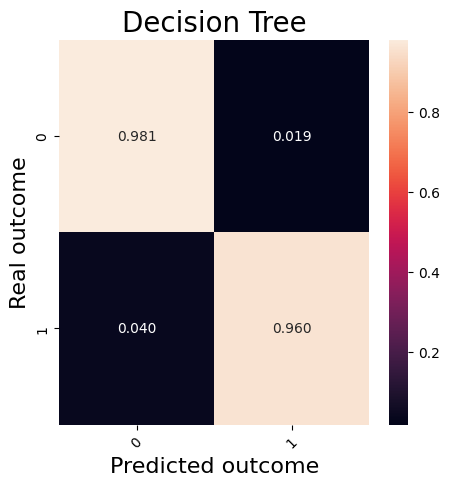

In [7]:
model_name = 'Decision Tree'
getMetrics(model_name, y_test_pred, y_test_df.values.flatten())
getCM(model_name, y_test_pred, y_test_df.values.flatten() )